In [ ]:
import pandas as pd

df = pd.read_csv('/content/Housing_new.csv')

df['price'] = df['price'].fillna(df['price'].mean())
df['parking'].fillna(0,inplace=True)
df['bathrooms']=df['bathrooms'].interpolate()
print(df)
print(df['bathrooms'])

           price  area  bedrooms  bathrooms  stories mainroad guestroom  \
0   1.330000e+07  7420       4.0        2.0      3.0      yes        no   
1   1.225000e+07  8960       4.0        4.0      4.0      yes        no   
2   1.225000e+07  9960       3.0        2.0      2.0      yes        no   
3   8.191182e+06  7500       4.0        2.0      2.0      yes        no   
4   1.141000e+07  7420       4.0        1.0      2.0      yes       yes   
..           ...   ...       ...        ...      ...      ...       ...   
73  6.685000e+06  6600       2.0        2.0      4.0      yes        no   
74  6.650000e+06  4040       3.0        1.0      2.0      yes        no   
75  6.650000e+06  4260       4.0        2.0      2.0      yes        no   
76  6.650000e+06  6420       3.0        2.0      3.0      yes        no   
77  6.650000e+06  6500       3.0        2.0      NaN      yes        no   

   basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0        no       

<ipython-input-9-03e01206a6f5>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['parking'].fillna(0,inplace=True)


In [ ]:
column = 'price'

# Calculate Q1 (25%), Q3 (75%), and IQR
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit)
print(upper_limit)

# Find outliers
outliers = df[(df[column] < lower_limit) | (df[column] > upper_limit)]

print("Outliers in", column)
print(outliers)

5040000.0
10850000.0
Outliers in price
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000.0  7420       4.0        2.0      3.0      yes        no       no   
1  12250000.0  8960       4.0        4.0      4.0      yes        no       no   
2  12250000.0  9960       3.0        2.0      2.0      yes        no      yes   
4  11410000.0  7420       4.0        1.0      2.0      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes      2.0      yes        furnished  
1              no             yes      3.0       no        furnished  
2              no              no      2.0      yes   semi-furnished  
4              no             yes      2.0       no        furnished  


In [ ]:
print(df.describe())

              price          area   bedrooms  bathrooms    stories    parking
count  7.800000e+01     78.000000  77.000000  78.000000  76.000000  78.000000
mean   8.191182e+06   7103.551282   3.389610   1.820513   2.644737   1.205128
std    1.376635e+06   2192.205097   0.631536   0.597475   1.103980   0.811588
min    6.650000e+06   3500.000000   2.000000   1.000000   1.000000   0.000000
25%    7.218750e+06   6000.000000   3.000000   1.000000   2.000000   1.000000
50%    7.936250e+06   6545.000000   3.000000   2.000000   2.000000   1.000000
75%    8.671250e+06   7775.000000   4.000000   2.000000   4.000000   2.000000
max    1.330000e+07  16200.000000   5.000000   4.000000   4.000000   3.000000


       Price_new  area  bedrooms  bathrooms  stories mainroad guestroom  \
0   1.330000e+07  7420       4.0        2.0      3.0      yes        no   
1   1.225000e+07  8960       4.0        4.0      4.0      yes        no   
2   1.225000e+07  9960       3.0        2.0      2.0      yes        no   
3   8.191182e+06  7500       4.0        2.0      2.0      yes        no   
4   1.141000e+07  7420       4.0        1.0      2.0      yes       yes   
..           ...   ...       ...        ...      ...      ...       ...   
73  6.685000e+06  6600       2.0        2.0      4.0      yes        no   
74  6.650000e+06  4040       3.0        1.0      2.0      yes        no   
75  6.650000e+06  4260       4.0        2.0      2.0      yes        no   
76  6.650000e+06  6420       3.0        2.0      3.0      yes        no   
77  6.650000e+06  6500       3.0        2.0      NaN      yes        no   

   basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
0        no       

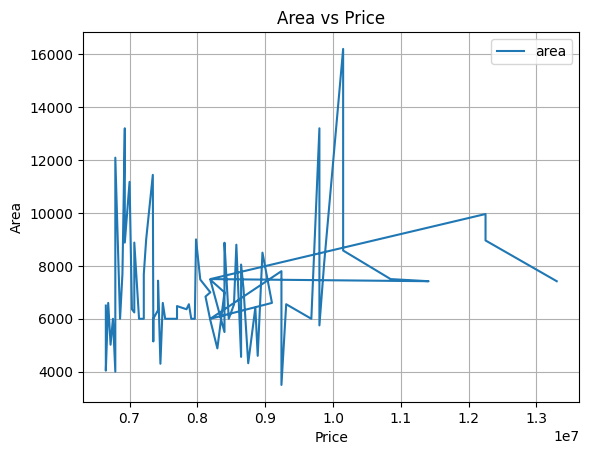

In [ ]:
df = df.rename(columns={'price': 'Price_new'})

print(df)

#Line Plot
import matplotlib.pyplot as plt
df.plot(x='Price_new', y='area', kind='line', title='Area vs Price', legend=True) #The legend is the little box (usually on the side or top corner) that tells you which line or color represents which data—especially useful when you're plotting multiple columns.
plt.xlabel('Price')
plt.ylabel('Area')
plt.grid(True)


plt.show()

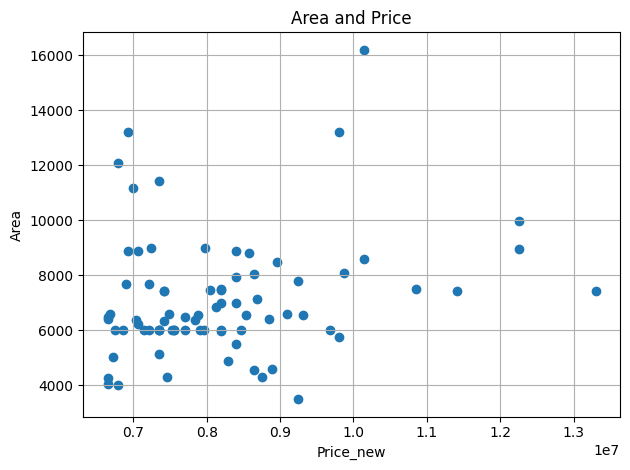

In [ ]:
# Scatter Plot
plt.scatter(df['Price_new'], df['area'])
plt.title('Area and Price')
plt.xlabel('Price_new')
plt.ylabel('Area')
plt.grid(True)
plt.tight_layout() # It automatically adjusts the spacing between plot elements (like labels, titles, axes) so that nothing overlaps or gets cut off—especially helpful when you have:
plt.show()

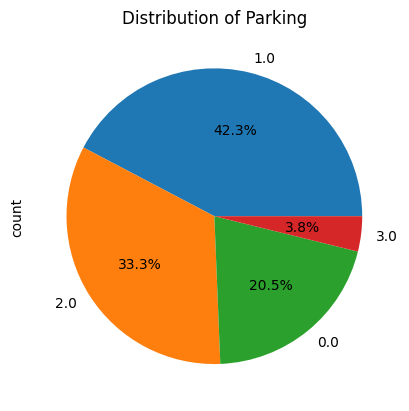

In [ ]:
df['parking'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Distribution of Parking')
plt.show()

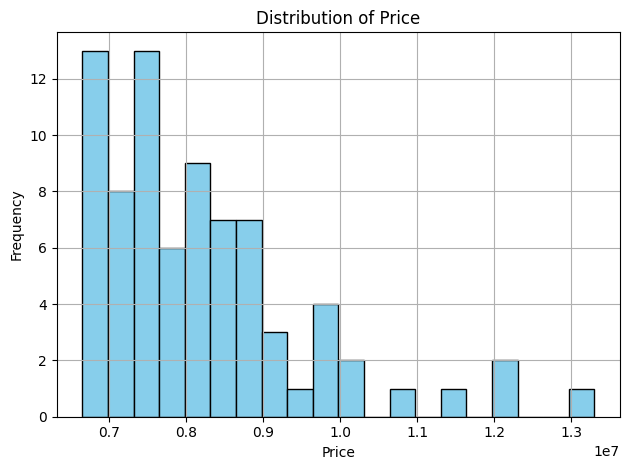

In [ ]:
df['Price_new'].plot(
    kind='hist',
    bins=20,               # Number of bars/bins
    title='Distribution of Price',
    color='skyblue',       # Bar color
    edgecolor='black',     # Border for bars
    grid=True
)
plt.xlabel('Price')
plt.tight_layout()
plt.show()